# DATA CLEANING USING PYTHON

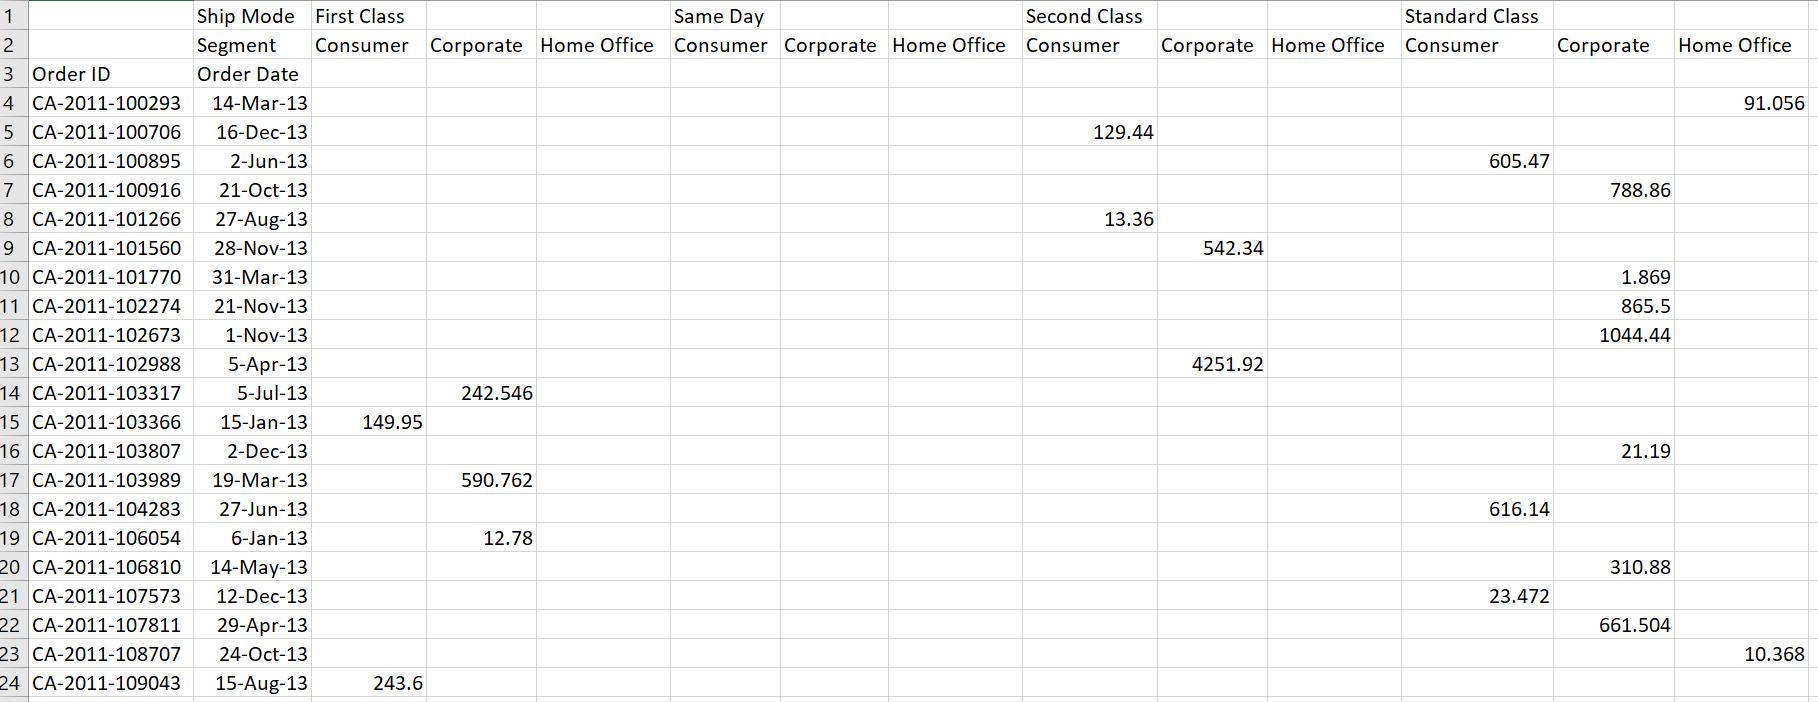<br>
###### _Our Raw Data_

The Key role of any Data Analyst is to turn raw data into information and then into knowledge that can be contextualized and applied for , inorder to achieve this we have to analyse our data. But how can you analyse data that is in 
Once we get our data we have to process it into a cleaner format that can then be easily used to achieve calculations 

In [1]:
import pandas as pd #data processing and manipulation
from pathlib import Path #path navigation library, treats file paths as objects

In [2]:
DATA_DIR = Path.cwd() / '.' #the folder directory with our file, which is our currently dir (.)
file_to_clean = DATA_DIR / '3.-Badly-Structured-Sales-Data-3.xlsx' #our file path as a variable 'file_to_clean'

In [3]:
df = pd.read_excel(file_to_clean) #read our excel files, make sure to pip install openxyxl

In [32]:
df.head(5) # view the top our data

Unnamed: 0            Ship Mode First Class Unnamed: 3   Unnamed: 4  \
0             NaN              Segment    Consumer  Corporate  Home Office   
1        Order ID           Order Date         NaN        NaN          NaN   
2  CA-2011-100293  2013-03-14 00:00:00         NaN        NaN          NaN   
3  CA-2011-100706  2013-12-16 00:00:00         NaN        NaN          NaN   
4  CA-2011-100895  2013-06-02 00:00:00         NaN        NaN          NaN   

   Same Day Unnamed: 6   Unnamed: 7 Second Class Unnamed: 9  Unnamed: 10  \
0  Consumer  Corporate  Home Office     Consumer  Corporate  Home Office   
1       NaN        NaN          NaN          NaN        NaN          NaN   
2       NaN        NaN          NaN          NaN        NaN          NaN   
3       NaN        NaN          NaN       129.44        NaN          NaN   
4       NaN        NaN          NaN          NaN        NaN          NaN   

  Standard Class Unnamed: 12  Unnamed: 13  
0       Consumer   Corporate  Home Office  
1            NaN         NaN          NaN  
2            NaN         NaN       91.056  
3            NaN         NaN          NaN  
4         605.47         NaN          NaN

from the head of our dataset, we can see that our data is poorly structured. A rule of thumb is that each variable should have its own column andn each observation its own row i.e, Ship Mode as a column and the options available as row values. We need to work on reshaping our a dataset.

In [25]:
df.shape

(825, 14)

In [24]:
list(df.columns)

['Unnamed: 0',
 'Ship Mode',
 'First Class',
 'Unnamed: 3',
 'Unnamed: 4',
 'Same Day',
 'Unnamed: 6',
 'Unnamed: 7',
 'Second Class',
 'Unnamed: 9',
 'Unnamed: 10',
 'Standard Class',
 'Unnamed: 12',
 'Unnamed: 13']

In [26]:
list(df.iloc[0].unique()) #a list of  the unique elements in the first row after our header/column

[nan, 'Segment', 'Consumer', 'Corporate', 'Home Office']

Any given Order will fall under one of the three Segments

We have to reshape our dataframe to have Order ID, Order Date, Segment, Ship Mode and Amount as columns.

In [33]:
df.tail(5) #bottom of our data

Unnamed: 0            Ship Mode First Class Unnamed: 3 Unnamed: 4  \
819  US-2014-166233  2016-07-03 00:00:00         NaN        NaN        NaN   
820  US-2014-166611  2016-03-28 00:00:00         NaN        NaN        NaN   
821  US-2014-167920  2016-12-09 00:00:00         NaN        NaN        NaN   
822  US-2014-168116  2016-11-04 00:00:00         NaN        NaN        NaN   
823  US-2014-168690  2016-01-08 00:00:00         NaN        NaN        NaN   

    Same Day Unnamed: 6 Unnamed: 7 Second Class Unnamed: 9 Unnamed: 10  \
819      NaN        NaN        NaN          NaN        NaN         NaN   
820      NaN        NaN        NaN          NaN        NaN         NaN   
821      NaN        NaN        NaN      1827.51        NaN         NaN   
822      NaN    8167.42        NaN          NaN        NaN         NaN   
823      NaN        NaN        NaN          NaN        NaN         NaN   

    Standard Class Unnamed: 12 Unnamed: 13  
819             24         NaN         NaN  
820            NaN      68.742         NaN  
821            NaN         NaN         NaN  
822            NaN         NaN         NaN  
823          2.808         NaN         NaN

In [30]:
df.drop(index=824, inplace=True) #to remove the Grand Total row

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      824 non-null    object
 1   Ship Mode       824 non-null    object
 2   First Class     74 non-null     object
 3   Unnamed: 3      42 non-null     object
 4   Unnamed: 4      14 non-null     object
 5   Same Day        30 non-null     object
 6   Unnamed: 6      7 non-null      object
 7   Unnamed: 7      8 non-null      object
 8   Second Class    93 non-null     object
 9   Unnamed: 9      52 non-null     object
 10  Unnamed: 10     25 non-null     object
 11  Standard Class  255 non-null    object
 12  Unnamed: 12     154 non-null    object
 13  Unnamed: 13     92 non-null     object
dtypes: object(14)
memory usage: 90.4+ KB


In [9]:
df

Unnamed: 0            Ship Mode First Class Unnamed: 3   Unnamed: 4  \
0               NaN              Segment    Consumer  Corporate  Home Office   
1          Order ID           Order Date         NaN        NaN          NaN   
2    CA-2011-100293  2013-03-14 00:00:00         NaN        NaN          NaN   
3    CA-2011-100706  2013-12-16 00:00:00         NaN        NaN          NaN   
4    CA-2011-100895  2013-06-02 00:00:00         NaN        NaN          NaN   
..              ...                  ...         ...        ...          ...   
820  US-2014-166611  2016-03-28 00:00:00         NaN        NaN          NaN   
821  US-2014-167920  2016-12-09 00:00:00         NaN        NaN          NaN   
822  US-2014-168116  2016-11-04 00:00:00         NaN        NaN          NaN   
823  US-2014-168690  2016-01-08 00:00:00         NaN        NaN          NaN   
824     Grand Total                  NaN   20802.173  20792.607     7737.786   

     Same Day Unnamed: 6   Unnamed: 7 Second Class Unnamed: 9  Unnamed: 10  \
0    Consumer  Corporate  Home Office     Consumer  Corporate  Home Office   
1         NaN        NaN          NaN          NaN        NaN          NaN   
2         NaN        NaN          NaN          NaN        NaN          NaN   
3         NaN        NaN          NaN       129.44        NaN          NaN   
4         NaN        NaN          NaN          NaN        NaN          NaN   
..        ...        ...          ...          ...        ...          ...   
820       NaN        NaN          NaN          NaN        NaN          NaN   
821       NaN        NaN          NaN      1827.51        NaN          NaN   
822       NaN    8167.42          NaN          NaN        NaN          NaN   
823       NaN        NaN          NaN          NaN        NaN          NaN   
824  8132.409   9907.308     2977.456   49724.2545  35243.231     8791.127   

    Standard Class Unnamed: 12  Unnamed: 13  
0         Consumer   Corporate  Home Office  
1              NaN         NaN          NaN  
2              NaN         NaN       91.056  
3              NaN         NaN          NaN  
4           605.47         NaN          NaN  
..             ...         ...          ...  
820            NaN      68.742          NaN  
821            NaN         NaN          NaN  
822            NaN         NaN          NaN  
823          2.808         NaN          NaN  
824    116922.1345  55942.7865   54748.6325  

[825 rows x 14 columns]

In [ ]:
df.melt(id_vars=[])

KeyError: "None of ['Order ID'] are in the columns"